In [18]:
import numpy as np
import nibabel as nib
import os
import matplotlib.pyplot as plt
import pandas as pd
from convert_fm import convert_ppm_to_Hz
from demod import demod_pls
from extract_metric import extract_metrics

gamma_bar = 42.58
B0 = 3

# Current </br>
*hash:* d9f785b082fb145d547ff03ae53f23f1564ccc38

In [4]:
# This code loads a FM and does all the processing until extract metrics.
# Only for quick testing 

path_to_test_fm = "data/lung_fitting_project/manually_simulated/ismrm_2025_fms/quick_test_mathieu/after/test_d9f78.nii.gz"
fm__ppm_img = nib.load(path_to_test_fm)
fm_ppm_data = fm__ppm_img.get_fdata()

fm_Hz_data = fm_ppm_data*gamma_bar*B0

ismrm_sc_seg_path = "data/lung_fitting_project/manually_simulated/ismrm_2025_fms/sc_seg_c2t7_final_ISMRM.nii.gz"
ismrm_vert_file_path = "data/lung_fitting_project/manually_simulated/ismrm_2025_fms/t1w_wholebody_label_vertebrae_final cropped.nii.gz"

demodulating_mask_img = nib.load("data/lung_fitting_project/manually_simulated/ismrm_2025_fms/sc_seg_dilate2_10.nii.gz")
demodulating_mask_data = demodulating_mask_img.get_fdata()

In [5]:
demod_factor = np.mean(fm_Hz_data[demodulating_mask_data == 1])
print("Demoded with: ", demod_factor," Hz")
demod_fm_Hz = fm_Hz_data - demod_factor
    

Demoded with:  -298.3739208814192  Hz


In [6]:
np.mean(demod_fm_Hz[demodulating_mask_data==1])

np.float64(1.5933233782341815e-14)

In [7]:
demoded_quick_test_img = nib.Nifti1Image(demod_fm_Hz, affine = fm__ppm_img.affine)

nib.save(demoded_quick_test_img, "data/lung_fitting_project/manually_simulated/ismrm_2025_fms/quick_test_mathieu/demod_test_d9f78.nii.gz")

# Now the before 

In [18]:
path_to_before_fm = "data/lung_fitting_project/manually_simulated/ismrm_2025_fms/quick_test_mathieu/before/debug_fftfix_oct_30.nii.gz"
before_fm_ppm_img = nib.load(path_to_before_fm)
before_fm_ppm_data = before_fm_ppm_img.get_fdata()

before_demodulating_mask_img = nib.load("data/lung_fitting_project/manually_simulated/ismrm_2025_fms/quick_test_mathieu/before/sc_dilate2_10.nii.gz")
before_demodulating_mask_data = before_demodulating_mask_img.get_fdata()

before_fm_Hz_data = before_fm_ppm_data*gamma_bar*B0

demod_before_factor = np.mean(before_fm_Hz_data[before_demodulating_mask_data==1])
print("Demoded with: ", demod_before_factor," Hz")

demod_before_fm_Hz = before_fm_Hz_data - demod_before_factor

demoded_before_fm_img = nib.Nifti1Image(demod_before_fm_Hz, affine = before_fm_ppm_img.affine)

nib.save(demoded_before_fm_img, "data/lung_fitting_project/manually_simulated/ismrm_2025_fms/quick_test_mathieu/before/demod_debug_fftfix_oct30.nii.gz")



Demoded with:  69.06261509538147  Hz


In [9]:
quick_test_before = [-40.83, -53.09, -28.37, 15.09, 71.99, 115.96, 110.45, 76.88, 56.36, 46.19, 24.47, 16.02, 40.43]
quick_test_after = [83.49, 60.06, 52.57, 46.39, 47.46, 47.41, 20.26, 5.7, 14.16, 29.55, 26.66, 19.44, 16.09]
vertebrae_levels_c2_t7 = [ 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7']

len(quick_test_after)

13

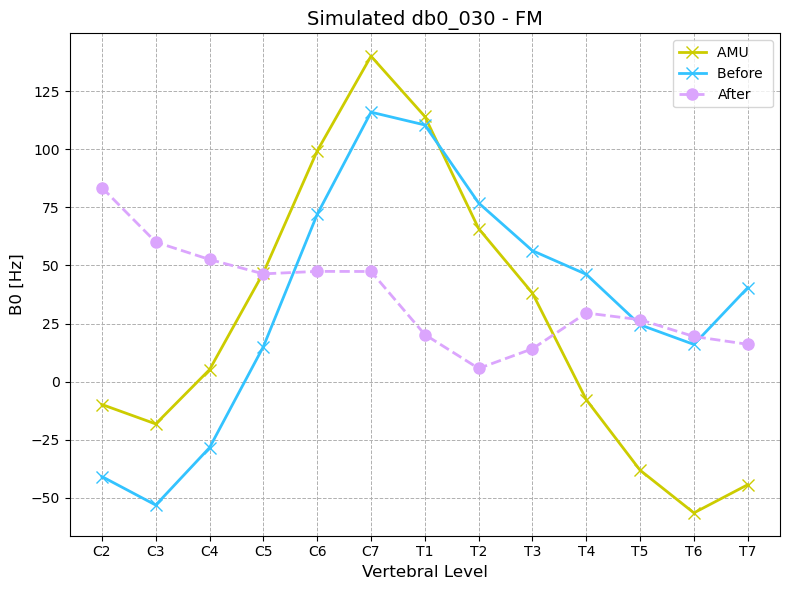

In [10]:
amu = [-9.83, -18.18, 5.2, 46.88, 99.27, 140.05, 114.10, 65.87, 38.09, -7.72, -38.09,-56.45, -44.33]
#
# Create the plot
plt.figure(figsize=(8, 6))

# ROMEO
plt.plot(vertebrae_levels_c2_t7, amu , marker = 'x', color = '#cccc00', linestyle='-', linewidth = 2, markersize = 8, label ='AMU ')
plt.plot(vertebrae_levels_c2_t7, quick_test_before , marker = 'x', color = '#33C3FF', linestyle='-', linewidth = 2, markersize = 8, label ='Before ')
plt.plot(vertebrae_levels_c2_t7, quick_test_after, marker = 'o', color = '#DBA5FD', linestyle='--', linewidth = 2, markersize = 8, label = "After")


# Plot Simulated demodulated values
#plt.plot(vertebrae_levels_c7_t7, abs_sim_custom3, )


# Add titles and labels
plt.title('Simulated db0_030 - FM', fontsize=14)
plt.xlabel('Vertebral Level', fontsize=12)
plt.ylabel('B0 [Hz]', fontsize=12)

plt.legend()
# Customize grid and display
plt.grid(True, which='both', linestyle='--', linewidth=0.7)
plt.tight_layout()

# Show the plot
plt.show()

### Testing how all this changes affected AMU VC fieldmap

In [7]:
path_to_AMU = "data/lung_fitting_project/manually_simulated/ismrm_2025_fms/quick_AMU/db0_AMU_VC_fm_ppm.nii.gz"
AMU_fm_ppm_img = nib.load(path_to_AMU)
AMU_fm_ppm_data = AMU_fm_ppm_img.get_fdata()

amu_demod_mask_img = nib.load("data/lung_fitting_project/manually_simulated/ismrm_2025_fms/quick_AMU/demod_mask_AMU.nii.gz")
amu_demod_mask_data = amu_demod_mask_img.get_fdata()

amu_fm_Hz_data = AMU_fm_ppm_data*gamma_bar*B0

demod_AMU_factor = np.mean(amu_fm_Hz_data[amu_demod_mask_data==1])
print("Demoded with: ", demod_AMU_factor," Hz")

demod_AMU_fm_Hz = amu_fm_Hz_data - demod_AMU_factor

demoded_amu_fm_Hz_img = nib.Nifti1Image(demod_AMU_fm_Hz, affine = AMU_fm_ppm_img.affine)

nib.save(demoded_amu_fm_Hz_img, "data/lung_fitting_project/manually_simulated/ismrm_2025_fms/quick_AMU/demod_AMU_VC_fm_Hz.nii.gz")

Demoded with:  -112.47347707615909  Hz


# Quick no hump + skull & brain


In [5]:
path_to_test = "data/lung_fitting_project/manually_simulated/ismrm_2025_fms/with_skull_brain/db0_sim_4_2_hash_40acdc_fm_ppm.nii.gz"
test_ppm_img = nib.load(path_to_test)
test_ppm_data = test_ppm_img.get_fdata()

test_demod_mask_img= nib.load("data/lung_fitting_project/manually_simulated/ismrm_2025_fms/sc_seg_dilate2_10.nii.gz")
test_demod_mask_data = test_demod_mask_img.get_fdata()

test_Hz_fm= test_ppm_data*gamma_bar*B0

test_demod_factor = np.mean(test_Hz_fm[test_demod_mask_data==1])

print("Demoded with: ", test_demod_factor," Hz")

demod_test_fm_Hz = test_Hz_fm - test_demod_factor

demod_test_fm_Hz = nib.Nifti1Image(demod_test_fm_Hz, affine = test_ppm_img.affine)

nib.save(demod_test_fm_Hz, "data/lung_fitting_project/manually_simulated/ismrm_2025_fms/demod/test_4_2_fm_Hz.nii.gz")

Demoded with:  -300.6564313807115  Hz


In [10]:
# Save in HZ ONLY maybe its the demod mask
test_fm_Hz_img = nib.Nifti1Image(test_Hz_fm, affine = test_ppm_img.affine)

nib.save(test_fm_Hz_img, "data/lung_fitting_project/manually_simulated/ismrm_2025_fms/test_4_2_fm_Hz.nii.gz")

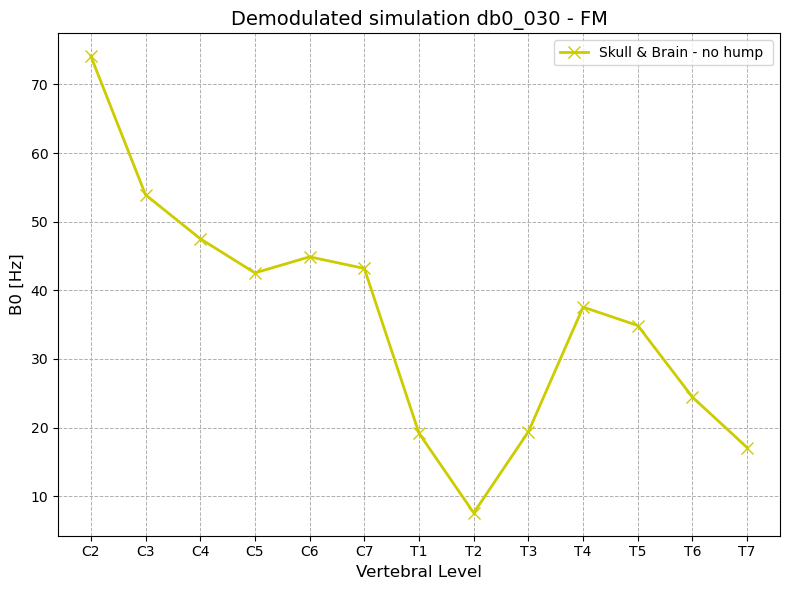

In [16]:
test = [74.12, 53.92, 47.52, 42.54, 44.88, 43.19, 19.17, 7.57, 19.40, 37.56, 34.87, 24.43, 17.08]
vertebrae_levels_c2_t7 = [ 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7']
# Create the plot
plt.figure(figsize=(8, 6))

# ROMEO
plt.plot(vertebrae_levels_c2_t7, test , marker = 'x', color = '#cccc00', linestyle='-', linewidth = 2, markersize = 8, label ='Skull & Brain - no hump ')


# Plot Simulated demodulated values
#plt.plot(vertebrae_levels_c7_t7, abs_sim_custom3, )


# Add titles and labels
plt.title('Demodulated simulation db0_030 - FM', fontsize=14)
plt.xlabel('Vertebral Level', fontsize=12)
plt.ylabel('B0 [Hz]', fontsize=12)

plt.legend()
# Customize grid and display
plt.grid(True, which='both', linestyle='--', linewidth=0.7)
plt.tight_layout()

# Show the plot
plt.show()

# Manually plotting with ITK values - AMU FMs


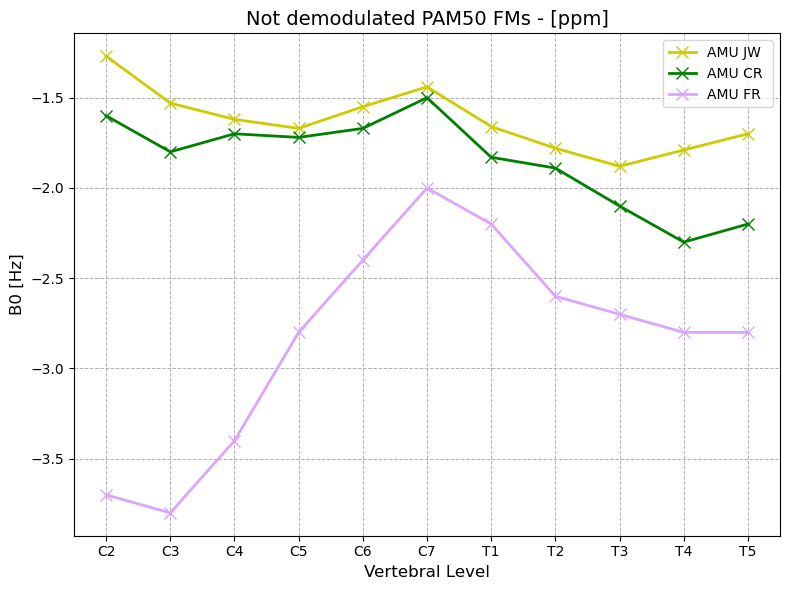

In [7]:

vert_level_test = [ 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'T1', 'T2', 'T3', 'T4', 'T5']

amuJW = [-1.27, -1.53, -1.62, -1.67, -1.55, -1.44, -1.66, -1.78, -1.88, -1.79, -1.70]
amuCR = [-1.6, -1.8, -1.7, -1.72, -1.67, -1.5, -1.83, -1.89, -2.1, -2.3, -2.2]
amuFR = [-3.7, -3.8, -3.4, -2.8, -2.4, -2.0, -2.2, -2.6, -2.7, -2.8, -2.8]
# Create the plot
plt.figure(figsize=(8, 6))

# 
plt.plot(vert_level_test, amuJW , marker = 'x', color = '#cccc00', linestyle='-', linewidth = 2, markersize = 8, label ='AMU JW ')
plt.plot(vert_level_test, amuCR , marker = 'x', color = '#008000', linestyle='-', linewidth = 2, markersize = 8, label ='AMU CR ')
plt.plot(vert_level_test, amuFR , marker = 'x', color = '#DBA5FD', linestyle='-', linewidth = 2, markersize = 8, label ='AMU FR ')


# Plot Simulated demodulated values
#plt.plot(vertebrae_levels_c7_t7, abs_sim_custom3, )


# Add titles and labels
plt.title('Not demodulated PAM50 FMs - [ppm]', fontsize=14)
plt.xlabel('Vertebral Level', fontsize=12)
plt.ylabel('B0 [Hz]', fontsize=12)

plt.legend()
# Customize grid and display
plt.grid(True, which='both', linestyle='--', linewidth=0.7)
plt.tight_layout()

# Show the plot
plt.show()

# db0_030 measured with Spinal Cord segmentation and dilated SC mask

In [12]:
romeo_measured_img = nib.load("data/lung_fitting_project/manually_simulated/ismrm_2025_fms/optimization_AMU/db0_030_qmasked_fm.nii.gz")
romeo_measured_data = romeo_measured_img.get_fdata()

mask_romeo_measured_sc_mask_img = nib.load("data/lung_fitting_project/manually_simulated/ismrm_2025_fms/optimization_AMU/c2_t7_sc_mask_db0_030_meas.nii.gz")
mask_romeo_measured_sc_mask_data = mask_romeo_measured_sc_mask_img.get_fdata()

In [13]:
demod_factor_b0meas_sc = np.mean(romeo_measured_data[mask_romeo_measured_sc_mask_data==1])
print("Demodulating B0meas with: ",demod_factor_b0meas_sc,' Hz')

Demodulating B0meas with:  162.2678526263841  Hz


In [14]:
# Saving new demodulation
demoded_b0meas = romeo_measured_data - demod_factor_b0meas_sc

# Confirm that avg is zero

np.mean(demoded_b0meas[mask_romeo_measured_sc_mask_data==1])

np.float64(2.188557116653478e-14)

In [16]:
demoded_b0meas_img = nib.Nifti1Image(demoded_b0meas, affine = romeo_measured_img.affine )
nib.save(demoded_b0meas_img,"C:/Users/User/msc_project/sus-optimization/data/amu_vs_meas/demoded_fms/demoded_b0meas_img.nii.gz")

### AMU plotting initial guess value </br>
*Either -2.35 or 0.4/0.2?*

In [36]:
simulated_AMU_0_2_ppm_img = nib.load("data/lung_fitting_project/manually_simulated/ismrm_2025_fms/quick_AMU/chi_0_2/amu_fm_0_2_ppm.nii.gz")
simulated_AMU_0_2_ppm_data = simulated_AMU_0_2_ppm_img.get_fdata()

In [37]:
simulated_AMU_2_3_ppm_img = nib.load("data/lung_fitting_project/manually_simulated/ismrm_2025_fms/quick_amu/chi_2_3/amu_fm_2_3_ppm.nii.gz")
simulated_AMU_2_3_ppm_data = simulated_AMU_2_3_ppm_img.get_fdata()

In [38]:
demod_amuc2t7_mask_img = nib.load("data/lung_fitting_project/manually_simulated/ismrm_2025_fms/quick_amu/c2_t7_sc_mask_AMU_VC_sim.nii.gz")
demod_amuc2t7_mask_data = demod_amuc2t7_mask_img.get_fdata()

In [41]:
demodc2t7_amu_0_2_factor = np.mean(simulated_AMU_0_2_ppm_data[demod_amuc2t7_mask_data==1])
print("Demodulating amu 0.2 ppm with: ",demodc2t7_amu_0_2_factor,' ppm')

Demodulating amu 0.2 ppm with:  -0.9460774876048929  ppm


In [42]:
demodc2t7_amu_2_3_ppm = np.mean(simulated_AMU_2_3_ppm_data[demod_amuc2t7_mask_data==1])
print("Demodulating amu -2.3 ppm with: ",demodc2t7_amu_2_3_ppm,' ppm')

Demodulating amu -2.3 ppm with:  -0.8070460939937387  ppm


In [43]:
demodc2t7_amu_0_2_fm_Hz = (simulated_AMU_0_2_ppm_data - demodc2t7_amu_0_2_factor)*42.58*3

In [44]:
demodc2t7_amu_2_3_fm_Hz = (simulated_AMU_2_3_ppm_data - demodc2t7_amu_2_3_ppm)*42.58*3

In [45]:
initial_amu_fm_Hz_img = nib.Nifti1Image(demodc2t7_amu_0_2_fm_Hz, affine = simulated_AMU_0_2_ppm_img.affine)
nib.save(initial_amu_fm_Hz_img,"data/lung_fitting_project/manually_simulated/ismrm_2025_fms/quick_amu/chi_0_2/demod_AMU_chi_0_2_fm_Hz.nii.gz")

In [46]:
initial_2_3_amu_fm_Hz_img = nib.Nifti1Image(demodc2t7_amu_2_3_fm_Hz, affine = simulated_AMU_2_3_ppm_img.affine)
nib.save(initial_2_3_amu_fm_Hz_img,"data/lung_fitting_project/manually_simulated/ismrm_2025_fms/quick_amu/chi_2_3/demod_AMU_chi_2_3_fm_Hz.nii.gz")

In [ ]:
#Extract metrics and plotting initial 2_3 vs measured 

from extract_metric import extract_metrics
path_amu_demod = "data/lung_fitting_project/manually_simulated/ismrm_2025_fms/quick_amu/chi_2_3/demod_AMU_chi_2_3_fm_Hz.nii.gz"
path_amu_sc_seg = ""
extract_metrics()

In [61]:
data_amu_chi_2_3 = [-15.9589, -26.1912, -5.0900, 42.1113, 98.3414, 142.7416, 94.2893, 23.7413, -8.8719, -48.1439, -86.6387, -105.1905, -96.3517]
data_meas = [-114.4866, -101.0895, -43.1777, 28.1947, 108.5242, 146.3648, 94.0083, 9.4665, -17.1480, -24.7593, -37.5776, -48.5010, -55.8265]
vertebrae_levels_c2_t7 = [ 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7']
data_amu_chi_0_2 = [1.64083, -4.58333, 21.199, 73.5591, 134.231, 174.292, 97.7184, 0.298155, -34.4296, -73.6813, -114.521, -132.822, -119.369]


<>:6: SyntaxWarning: invalid escape sequence '\c'
<>:6: SyntaxWarning: invalid escape sequence '\c'
C:\Users\User\AppData\Local\Temp\ipykernel_16240\3359893211.py:6: SyntaxWarning: invalid escape sequence '\c'
  plt.plot(vertebrae_levels_c2_t7, data_amu_chi_0_2 , marker = 'o', color = '#3333ff', linestyle='--', linewidth = 2, markersize = 8, label ='Simulated $\chi$ 0.2')


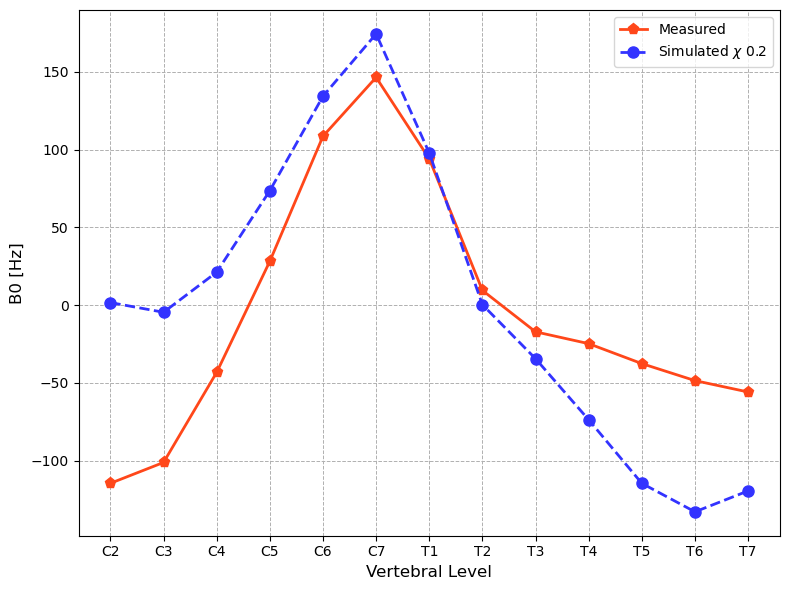

In [64]:
plt.figure(figsize=(8, 6))

# ROMEO
#plt.plot(vertebrae_levels_c2_t7, data_amu_chi_2_3 , marker = 'o', color = '#3333ff', linestyle='--', linewidth = 2, markersize = 8, label ='Simulated $\chi$ -2.3')
plt.plot(vertebrae_levels_c2_t7, data_meas, marker = 'p', color = '#ff471a', linestyle='-', linewidth = 2, markersize = 8, label = "Measured")
plt.plot(vertebrae_levels_c2_t7, data_amu_chi_0_2 , marker = 'o', color = '#3333ff', linestyle='--', linewidth = 2, markersize = 8, label ='Simulated $\chi$ 0.2')

# Plot Simulated demodulated values
#plt.plot(vertebrae_levels_c7_t7, abs_sim_custom3, )


# Add titles and labels
#plt.title('Simulated vs Measured db0_030 - FM', fontsize=14)


plt.legend()

plt.xlabel('Vertebral Level', fontsize=12)
plt.ylabel('B0 [Hz]', fontsize=12)
# Customize grid and display
plt.grid(True, which='both', linestyle='--', linewidth=0.7)
plt.tight_layout()

# Show the plot
plt.show()